<a href="https://colab.research.google.com/github/1337Rinz/AI_ML/blob/main/airlines%20predict%20delay%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
# data source : https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay

In [97]:
def missing_values(df):
        mis_val = df.isnull().sum() 
        mis_val_percent = 100 * df.isnull().sum() / len(df) 
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Số giá trị Missing', 1 : 'Tỷ lệ % missing'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Tỷ lệ % missing', ascending=False).round(2)
        print ("File dữ liệu bao gồm có: " + str(df.shape[1]) + " cột.\n"      
            "Có " + str(mis_val_table_ren_columns.shape[0]) +
              " cột chứa missing values.")
        return mis_val_table_ren_columns

# Tiền xử lý. 

In [98]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
# load dataset
df = pd.read_csv('https://raw.githubusercontent.com/1337Rinz/DATA_for_machine_learning/main/Airlines.csv')

print(df.shape)
df.head()


(539383, 9)


,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [100]:
# ktra có dữ liệu khuyết không

missing_values(df)

File dữ liệu bao gồm có: 9 cột.
Có 0 cột chứa missing values.


,Số giá trị Missing,Tỷ lệ % missing


In [101]:
df.info()
# ta thấy các feature [Airline, AirportFrom, AirportTo] chưa đồng bộ kiểu dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [102]:
# clone df = data(để xử lý tính toán không ảnh hưởng đến Dataset gốc)
# drop thuộc tính không quan trọng cols id
data = df
data = data.drop(['id'], axis = 1)
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Airline      539383 non-null  object
 1   Flight       539383 non-null  int64 
 2   AirportFrom  539383 non-null  object
 3   AirportTo    539383 non-null  object
 4   DayOfWeek    539383 non-null  int64 
 5   Time         539383 non-null  int64 
 6   Length       539383 non-null  int64 
 7   Delay        539383 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 32.9+ MB


,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,15,205,1
1,US,1558,PHX,CLT,3,15,222,1
2,AA,2400,LAX,DFW,3,20,165,1
3,AA,2466,SFO,DFW,3,20,195,1
4,AS,108,ANC,SEA,3,30,202,0


In [103]:
# kiểm tra mật độ Data
data.value_counts()

Airline  Flight  AirportFrom  AirportTo  DayOfWeek  Time  Length  Delay
AA       1008    SAN          DFW        5          515   180     0        5
F9       416     LAX          DEN        3          390   140     0        5
MQ       2711    DFW          CAE        3          450   130     0        5
         3193    LAX          SJC        3          400   75      0        5
WN       327     SEA          MDW        4          825   250     1        5
                                                                          ..
DL       1576    PDX          ATL        4          1375  268     0        1
OO       6847    SBA          SFO        3          1240  80      1        1
                                         4          1240  80      0        1
                                                                  1        1
9E       3650    ATL          BHM        4          930   55      1        1
Length: 322765, dtype: int64

In [104]:
# số hoá  [Airline, AirportFrom, AirportTo] 
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data.Airline)
data['Airline'] = le.transform(data.Airline)

le.fit(data.AirportFrom)
data['AirportFrom'] = le.transform(data.AirportFrom)

le.fit(data.AirportTo)
data['AirportTo'] = le.transform(data.AirportTo)

data.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,4,269,253,135,3,15,205,1
1,14,1558,217,60,3,15,222,1
2,1,2400,154,80,3,20,165,1
3,1,2466,253,80,3,20,195,1
4,2,108,14,252,3,30,202,0


In [105]:
''' 
# chú thích [categorical_Airline;	categorical_AirportFrom;	categorical_AirportTo]
{categorical_Airline [AA : 1,... ]
{categorical_AirportFrom [ANC: 14,... ]}
{categorical_AirportTo [DFW: 80,...]}
'''

' \n# chú thích [categorical_Airline;\tcategorical_AirportFrom;\tcategorical_AirportTo]\n{categorical_Airline [AA : 1,... ]\n{categorical_AirportFrom [ANC: 14,... ]}\n{categorical_AirportTo [DFW: 80,...]}\n'

In [106]:
# kiểm trùng và loại bỏ

datashape = data.shape
data.drop_duplicates(inplace=True)
dif_datashape = datashape[0] - data.shape[0]

print("Data shape gốc: ",datashape)
print("Data shape sau khi loại bỏ data trùng lặp: ",data.shape)     
print("Ta đã loại bỏ {} dòng ".format(dif_datashape))

Data shape gốc:  (539383, 8)
Data shape sau khi loại bỏ data trùng lặp:  (322765, 8)
Ta đã loại bỏ 216618 dòng 


In [107]:
# xuất file csv đã xử lý
data.to_csv('Airlines_OK.csv',index=None)

# Data_2


In [114]:
#Đọc dữ liệu:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data_2 = pd.read_csv('Airlines_OK.csv')
Data_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322765 entries, 0 to 322764
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   Airline      322765 non-null  int64
 1   Flight       322765 non-null  int64
 2   AirportFrom  322765 non-null  int64
 3   AirportTo    322765 non-null  int64
 4   DayOfWeek    322765 non-null  int64
 5   Time         322765 non-null  int64
 6   Length       322765 non-null  int64
 7   Delay        322765 non-null  int64
dtypes: int64(8)
memory usage: 19.7 MB


In [131]:
Data_2.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,4,269,253,135,3,15,205,1
1,14,1558,217,60,3,15,222,1
2,1,2400,154,80,3,20,165,1
3,1,2466,253,80,3,20,195,1
4,2,108,14,252,3,30,202,0


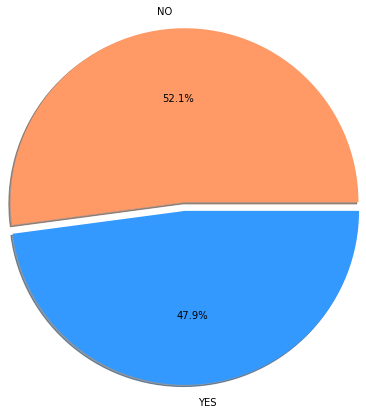

0    168163
1    154602
Name: Delay, dtype: int64


In [122]:
pie_df=pd.DataFrame(Data_2.groupby('Delay')['Delay'].count())

colors = ['#ff9966','#3399ff']
plt.pie(pie_df['Delay'],labels=['NO','YES'],
        autopct='%.1f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)

plt.show()

print(Data_2["Delay"].value_counts())

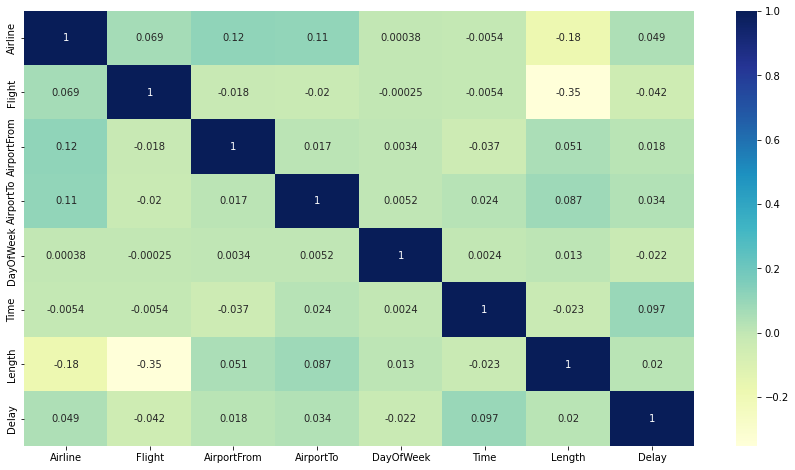

In [123]:
# heat map
plt.figure(figsize=(15,8))
sns.heatmap(Data_2.corr(), annot=True, cmap= 'YlGnBu')

##  DecisionTree DELAY or NOT


In [141]:
#Tách biến độc lập - biến phụ thuộc
X_B2 = Data_2.iloc[:,:5].values
y_B2 = Data_2.iloc[:,-1].values

print('Kích thước biến độc lập X(features):', X_B2.shape)
print('Kích thước biến phụ thuộc y(target)   :', y_B2.shape)

Kích thước biến độc lập X(features): (322765, 5)
Kích thước biến phụ thuộc y(target)   : (322765,)


In [142]:
#Tách dữ liệu thành 2 phần Train - Test:
from sklearn.model_selection import train_test_split
X_train_B2, X_test_B2, y_train_B2, y_test_B2 = train_test_split(X_B2, y_B2, 
                                                    test_size=0.20, 
                                                    random_state=50)

print("1. Kích thước tập Training: %d" %len(y_train_B2))
print("2. Kích thước tập Test    : %d" %len(y_test_B2))

1. Kích thước tập Training: 258212
2. Kích thước tập Test    : 64553


In [144]:
#Khai báo model phân lớp sử dụng cây quyết định:
#Gọi thư viên thuật toán DecisionTree
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()

#Các tham số của model DecisionTree
print('DANH SÁC CÁC THAM SỐ CỦA MODEL:')
model_tree.get_params()


DANH SÁC CÁC THAM SỐ CỦA MODEL:


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [145]:
# Huấn luyện mô hình với dữ liệu huấn luyện
model_tree.fit(X_train_B2, y_train_B2)

print("Độ chính xác của tập huấn luyện:",round(model_tree.score(X_train_B2, y_train_B2)*100,2))

Độ chính xác của tập huấn luyện: 73.6


In [146]:
#Đặt tên cho các thuộc tính và các lớp :
feature_names = ['Airline','Flight','AirportFrom','AirportTo','DayOfWeek']
target_names = ['0: No', '1: Yes']

['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek']
[0.08412713 0.44234052 0.12524655 0.13738127 0.21090453]


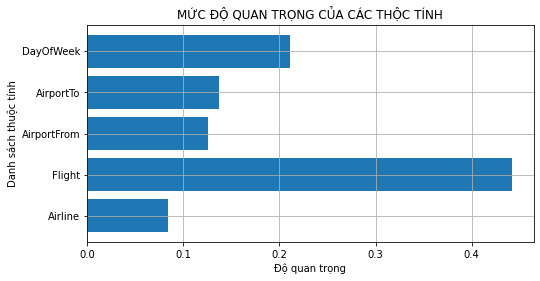

In [147]:
#Xác định mực độ quan trọng của các thuộc tính độc lập:
print(feature_names)
print(model_tree.feature_importances_)

#Trực quan hóa
plt.figure(figsize=(8,4))
plt.barh(feature_names,model_tree.feature_importances_)

plt.title('MỨC ĐỘ QUAN TRỌNG CỦA CÁC THỘC TÍNH')
plt.ylabel('Danh sách thuộc tính')
plt.xlabel('Độ quan trọng')
plt.grid(True)
plt.show()

In [148]:
y_pred_B2 = model_tree.predict(X_test_B2)

print("Kết quả phân loại DELAY tập dữ liệu TEST:")
print("Predicted labels: ", y_pred_B2)
print("Ground truth    : ", y_test_B2)

Kết quả phân loại DELAY tập dữ liệu TEST:
Predicted labels:  [0 0 0 ... 0 0 0]
Ground truth    :  [0 1 1 ... 1 0 0]


In [154]:
y_pred_B2 = model_tree.predict(X_test_B2)
#Đánh giá độ chính xác:
from sklearn.metrics import accuracy_score
acc_B2 = accuracy_score(y_test_B2, y_pred_B2, normalize=True)
acc_num_B2 = accuracy_score(y_test_B2, y_pred_B2, normalize=False)

print("Độ chính xác đạt của model trên tập Test:", round(acc_B2*100,2))
print("Tổng số mẫu dự đoán đúng:",acc_num_B2, '/', len(y_test_B2))

Độ chính xác đạt của model trên tập Test: 35.39
Tổng số mẫu dự đoán đúng: 22847 / 64553


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


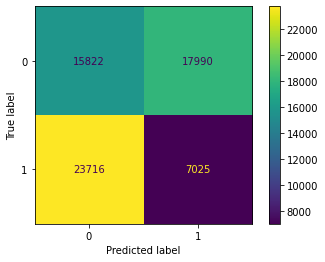

In [150]:
## Ma trận confusion matrix trên tập Test
#Hiển thị confusion matrix:
from sklearn.metrics import plot_confusion_matrix

#Hiển thị confusion matrix theo số lượng:
plot_confusion_matrix(model_tree, X_test_B2, y_test_B2)  
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


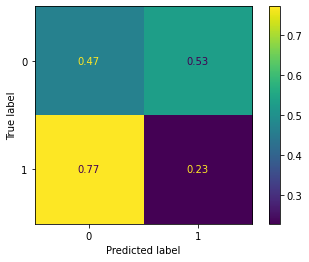

In [151]:
#Hiển thị confusion matrix theo tỷ lệ % của từng class:
plot_confusion_matrix(model_tree, X_test_B2, y_test_B2, normalize='true')  
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


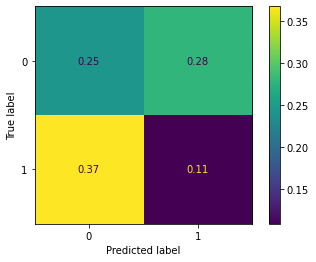

In [152]:
#Hiển thị confusion matrix theo tỷ lệ % của tất cả các mẫu:
plot_confusion_matrix(model_tree, X_test_B2, y_test_B2, normalize='all')  
plt.show()

In [153]:
# predict new input [4	269	253	135	3	]
import numpy as np
X_5 = np.array([(4,	269,	253,	135,	3)])

print('Thông số input mới:', X_5)

#Xác định delay hay không dựa vào các thông số này trên model đã huấn luyện
y_5 = model_tree.predict(X_5)

print('---------------------------------------------')
print('MACHINE LEARNING dự đoán chuyến bay có delay hay không:')
if y_5==0:
    print(target_names[0])
elif y_5==1:
    print(target_names[1])

Thông số input mới: [[  4 269 253 135   3]]
---------------------------------------------
MACHINE LEARNING dự đoán chuyến bay có delay hay không:
1: Yes


## naivebayes

In [155]:
#Tách biến độc lập - biến phụ thuộc
X_B2 = Data_2.iloc[:,:7].values
y_B2 = Data_2.iloc[:,-1].values

print('Kích thước biến độc lập X(features):', X_B2.shape)
print('Kích thước biến phụ thuộc y(target)   :', y_B2.shape)

Kích thước biến độc lập X(features): (322765, 7)
Kích thước biến phụ thuộc y(target)   : (322765,)


In [156]:
#Tách dữ liệu thành 2 phần Train - Test:
from sklearn.model_selection import train_test_split
X_train_B2, X_test_B2, y_train_B2, y_test_B2 = train_test_split(X_B2, y_B2, 
                                                    test_size=0.20, 
                                                    random_state=50)

print("1. Kích thước tập Training: %d" %len(y_train_B2))
print("2. Kích thước tập Test    : %d" %len(y_test_B2))

1. Kích thước tập Training: 258212
2. Kích thước tập Test    : 64553


In [160]:
#Khai báo model Gaussian NaiveBayes
#Gọi thư viên thuật toán Gaussian NaiveBayes
from sklearn.naive_bayes import GaussianNB

model_GNB = GaussianNB()

#Các tham số của model Gaussian NaiveBayes
print('DANH SÁC CÁC THAM SỐ CỦA MODEL:')
model_GNB.get_params()


DANH SÁC CÁC THAM SỐ CỦA MODEL:


{'priors': None, 'var_smoothing': 1e-09}

In [162]:
# Huấn luyện mô hình với dữ liệu huấn luyện
model_GNB.fit(X_train_B2, y_train_B2)

print("Độ chính xác của tập huấn luyện:",round(model_GNB.score(X_train_B2, y_train_B2)*100,2))

Độ chính xác của tập huấn luyện: 55.6


In [163]:
# Check for overfitting and underfitting 
print('\nTraining set score: {:.4f}'.format(model_GNB.score(X_train_B2, y_train_B2)))
print('Test set score: {:.4f}'.format(model_GNB.score(X_test_B2, y_test_B2)))


Training set score: 0.5560
Test set score: 0.5581


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


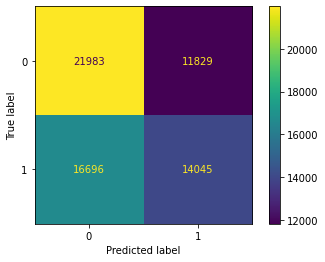

In [164]:
#Hiển thị confusion matrix theo số lượng:
plot_confusion_matrix(model_GNB, X_test_B2, y_test_B2)  
plt.show()

In [169]:
# Classification Report
from sklearn.metrics import classification_report
from sklearn import metrics

y_pred  = model_GNB.predict(X_test_B2)
print(metrics.classification_report(y_test_B2, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.57      0.65      0.61     33812
           1       0.54      0.46      0.50     30741

    accuracy                           0.56     64553
   macro avg       0.56      0.55      0.55     64553
weighted avg       0.56      0.56      0.55     64553

